# Lab 7 
# Support Vector Machines
## Submitted to: Prof. Sweetlin Hemlatha
## Submitted by: Prateek Singh (15BCE1091)

In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

sns.set(style='whitegrid', context='notebook', font_scale=1)

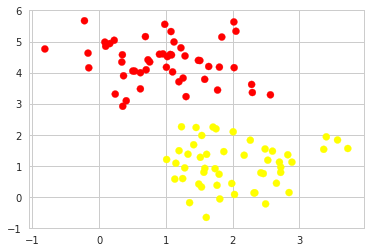

In [2]:
X, y =  make_blobs(n_samples=100, centers=2, random_state =0, cluster_std=0.70)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

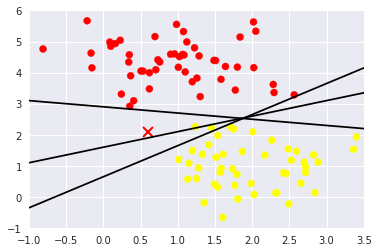

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit +b, '-k')

plt.xlim(-1, 3.5);

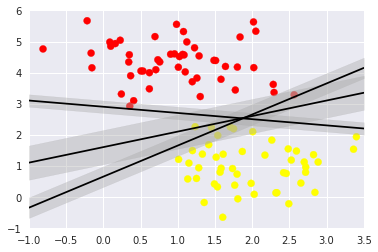

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)
    
plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundaries and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    #plot support vector machines
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

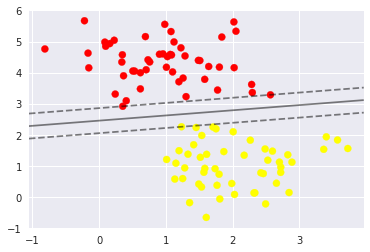

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

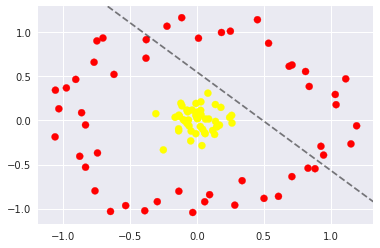

In [8]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

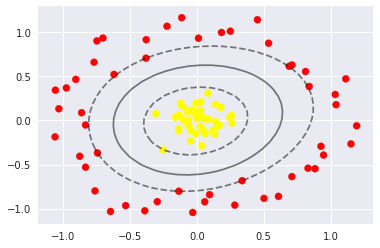

In [9]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### On my own dataset

In [3]:
wine_data = pd.read_csv('../Dataset/winequality-white.csv', sep=';')
red_wine = pd.read_csv('../Dataset/winequality-red.csv', sep=';')
wine_data.append(red_wine)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

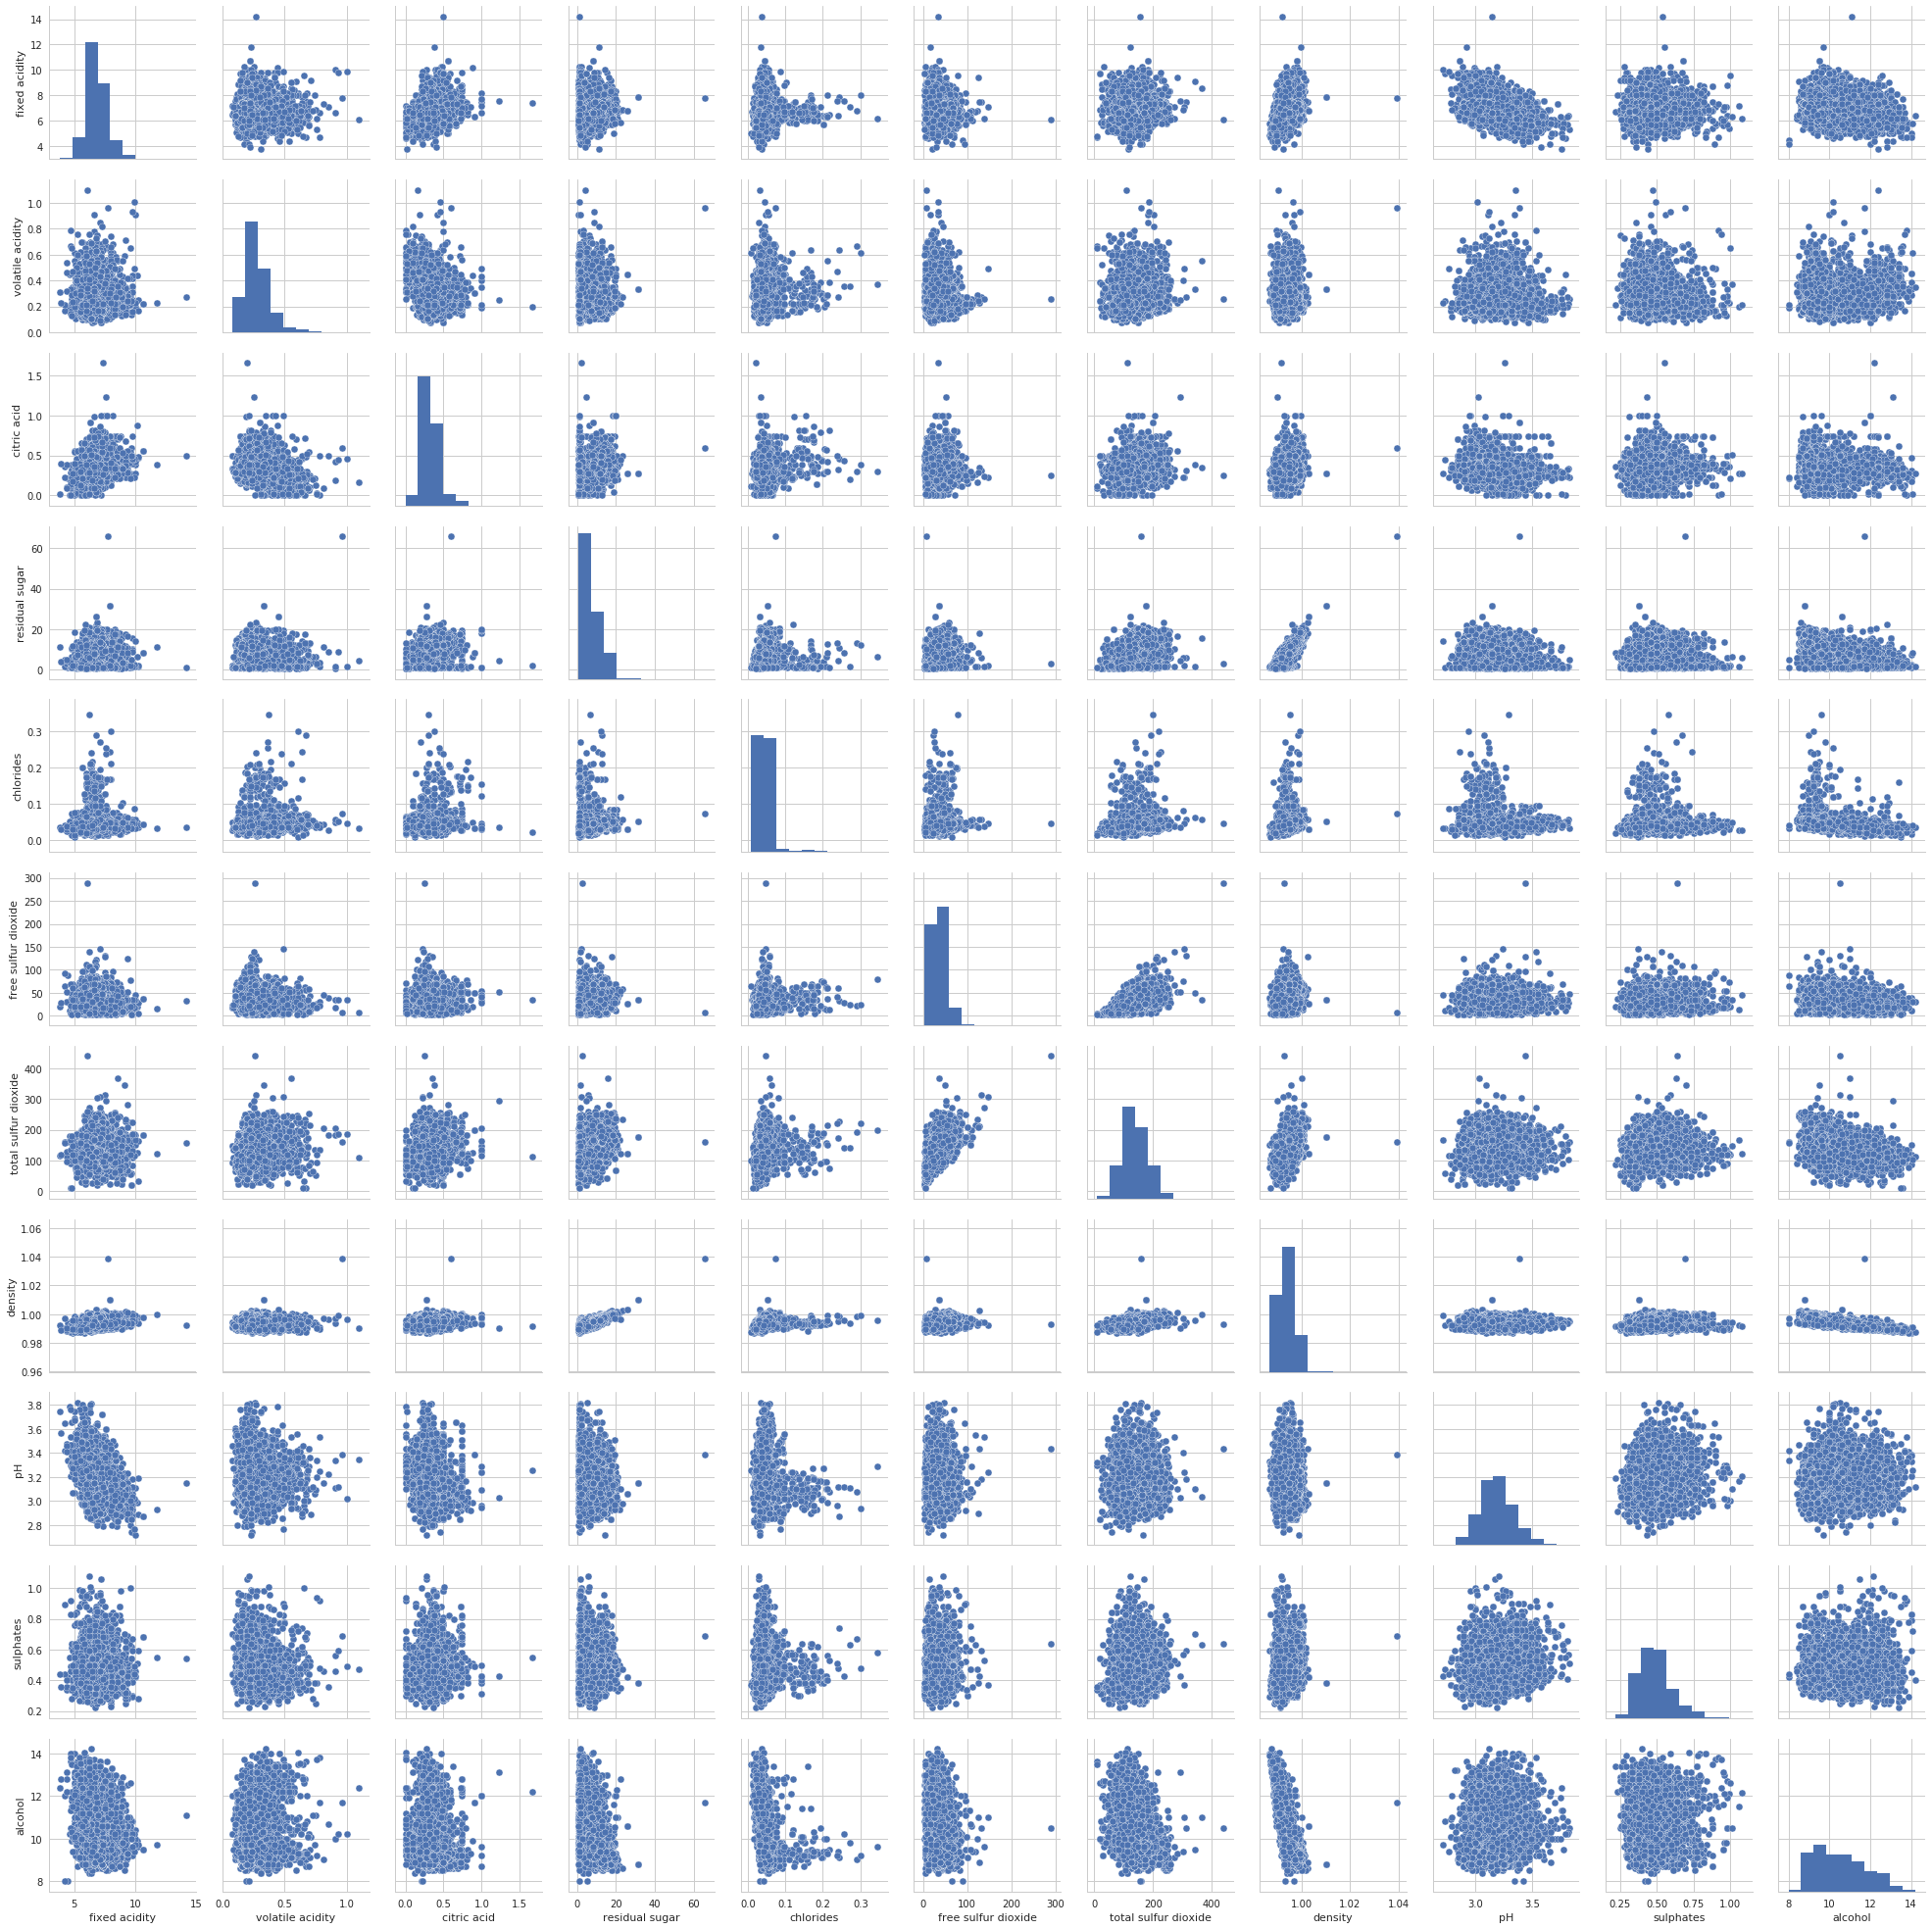

In [5]:
sns.pairplot(wine_data.iloc[:,:11].dropna(), size=2.5)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_data.iloc[:,:11],
                                                   wine_data.iloc[:, 11],
                                                   test_size=0.2,
                                                   random_state=42)
print('Size of training set: ', len(X_train.axes[0]))
print('Size of test set: ', len(X_test.axes[0]))

Size of training set:  3918
Size of test set:  980


In [7]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [8]:
clf = GridSearchCV(SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on training set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Grid scores on training set:
0.450 (+/-0.016) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.472 (+/-0.018) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.490 (+/-0.025) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.555 (+/-0.008) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.576 (+/-0.027) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.593 (+/-0.019) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.479 (+/-0.035) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.503 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.537 (+/-0.016) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.556 (+/-0.018) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.573 (+/-0.044) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.589 (+/-0.029) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.517 (+/-0.019) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.526 (+/-0.027) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.55

In [10]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
#data_train, data_test, label_train, label_test 

y_true, y_pred = Y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       1.00      0.08      0.15        25
          5       0.83      0.39      0.53       291
          6       0.55      0.95      0.70       432
          7       0.91      0.39      0.55       192
          8       1.00      0.37      0.54        35

avg / total       0.73      0.63      0.60       980




/home/prateek/anaconda3/envs/dltf/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
def plot_decision_surface(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v', '+', '.')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'lightblue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(15,15))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

In [22]:
svc = SVC(C=1.0, kernel='rbf')
svc.fit(X_train.iloc[:, [1, 10]], Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

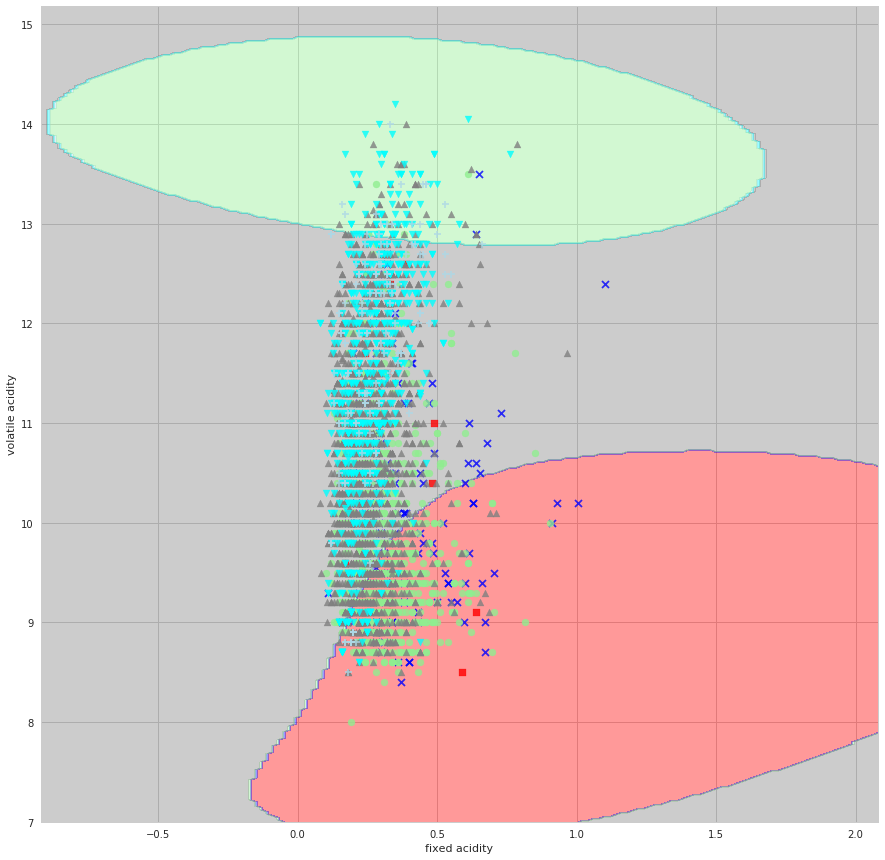

In [23]:
a = np.array(X_train.iloc[:, [1, 10]])
plot_decision_surface(X=a, y = np.array(Y_train.values), classifier=svc)